In [0]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import os
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
path = os.path.join("drive", "My Drive", "MinneMUDAC2019", "prediction")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#March data
march_dates = pd.read_csv(os.path.join(path,"march_new.csv"),skiprows = 3)
march_ma = pd.read_csv(os.path.join(path,"march_MA.csv"))
march_ma['Date'] = march_dates['Date']
march_ex_ma = pd.read_csv(os.path.join(path, "March_expo.csv"))
march_ex_ma['Date'] = march_dates['Date']
march_sarima = pd.read_csv(os.path.join(path, "march_SARIMA_diff.csv"))
march_sarima['Date'] = march_dates['Date']
march_naive = pd.read_csv(os.path.join(path, "march_naive_mean.csv"))
march_naive['Date'] = march_dates['Date']
march_lstm = pd.read_csv(os.path.join(path, "lstm_march.csv"))
march_lstm['Date'] = march_dates['Date']

print(march_ex_ma.head())

#renaming columns
march_ma.columns = ["Index", "Actual", "Predicted", "Error", "Date"]
march_ex_ma.columns = ["Index", "Actual", "Predicted", "Error", "Date"]
march_sarima.columns = ["Index", "Actual", "Predicted", "Error", "Date"]
march_naive.columns = ["Index", "Actual", "Predicted", "Error", "Date"]
march_lstm.columns = ["Index", "Actual", "Predicted", "Error", "Date"]

#print(len(march_ma), len(march_sarima), len(march_ex_ma), len(march_naive), len(march_lstm))

   Period  Actual    forecast     error        Date
0       0  928.25  935.079030  6.829030  11/14/2017
1       1  926.25  935.546461  9.296461  11/15/2017
2       2  931.00  934.917078  3.917078  11/16/2017
3       3  924.50  933.783939  9.283939  11/17/2017
4       4  925.75  932.678034  6.928034  11/20/2017


In [0]:
#May data
may_ma = pd.read_csv(os.path.join(path, "may_MA.csv"))
may_ex_ma = pd.read_csv(os.path.join(path, "May_expo.csv"))
may_sarima = pd.read_csv(os.path.join(path, "may_SARIMA_diff.csv"))
may_naive = pd.read_csv(os.path.join(path, "may_naive_mean.csv"))
may_lstm = pd.read_csv(os.path.join(path, "lstm_may.csv"))

#renaming columns
may_ma.columns = ["Date", "Actual", "Predicted", "Error"]
may_ex_ma.columns = ["Date", "Actual", "Predicted", "Error"]
may_sarima.columns = ["Date", "Actual", "Predicted", "Error"]
may_naive.columns = ["Date", "Actual", "Predicted", "Error"]
may_lstm.columns = ["Date", "Actual", "Predicted", "Error"]

print(may_ex_ma.head())
#print(len(may_ma), len(may_sarima), len(may_ex_ma), len(may_naive))

   Date  Actual   Predicted     Error
0     0  937.00  943.447020  6.447020
1     1  935.25  944.201693  8.951693
2     2  940.50  942.726093  2.226093
3     3  934.50  941.588210  7.088210
4     4  935.75  941.875668  6.125668


In [0]:
#July data
july_ma = pd.read_csv(os.path.join(path, "july_MA.csv"))
july_ex_ma = pd.read_csv(os.path.join(path, "July_expo.csv"))
july_sarima = pd.read_csv(os.path.join(path, "july_SARIMA_diff.csv"))
july_naive = pd.read_csv(os.path.join(path, "july_naive_mean.csv"))
july_lstm = pd.read_csv(os.path.join(path, "lstm_july.csv"))

#renaming columns
july_ma.columns = ["Date", "Actual", "Predicted", "Error"]
july_ex_ma.columns = ["Date", "Actual", "Predicted", "Error"]
july_sarima.columns = ["Date", "Actual", "Predicted", "Error"]
july_naive.columns = ["Date", "Actual", "Predicted", "Error"]
july_lstm.columns = ["Date", "Actual", "Predicted", "Error"]


print(july_ex_ma.head())

#verifying
#print(len(july_ma), len(july_sarima), len(july_ex_ma), len(july_naive))
#print([july_ma['Actual'][0], july_sarima['Actual'][0], july_ex_ma['Actual'][0], july_naive['Actual'][0]])

   Date  Actual   Predicted     Error
0     0  945.50  950.079956  4.579956
1     1  944.25  949.323548  5.073548
2     2  949.25  948.735119  0.514881
3     3  943.75  948.256975  4.506975
4     4  945.25  948.208817  2.958817


In [0]:
#Correlation Plot of predictions March
correlations_march = pd.DataFrame()
correlations_march["Actual"] = march_sarima["Actual"]
correlations_march["SARIMA"] = march_sarima["Predicted"]
correlations_march["Moving Average"] = march_ma["Predicted"]
correlations_march["Exponential MA"] = march_ex_ma["Predicted"]
correlations_march["LSTM"] = march_lstm["Predicted"]
correlations_march["Naive"] = march_naive["Predicted"]

corr = correlations_march.iloc[:75,:].corr( )

Text(0.5, 0.98, 'How Similar are the Models?\n\n')

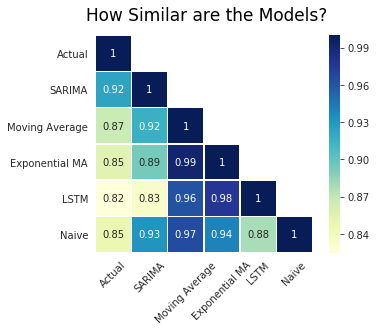

In [0]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
for i in range(6):
  mask[i][i] = False

with sns.axes_style("white"):
  ax = sns.heatmap(corr, mask=mask, square=True,annot=True,cmap="YlGnBu",linewidths=0.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.suptitle("How Similar are the Models?\n\n",fontsize = 17)


In [0]:
#plotting the predictions for past weeks
def plotGraph(month, dataframes):
  plt.style.use('seaborn-white')
  fig, ax = plt.subplots(figsize=(17,7))
  
  from datetime import datetime
  dates = pd.to_datetime(dataframes[0])

  import matplotlib.ticker as plticker

  plt.plot(dates, dataframes[5], color='magenta', label='Naive')
  plt.plot(dates, dataframes[3], color='black', label='Moving Average')
  plt.plot(dates, dataframes[2], color='green', label='Exponential Moving Average')
  plt.plot(dates, dataframes[6], color='red', label='LSTM')
  plt.plot(dates, dataframes[4], color='blue',label='SARIMA')
  plt.plot(dates, dataframes[1], color='orange', label='Actual Closing Prices'.format(month), linewidth=3.0)
  

  fig.suptitle("Soybean Futures {} 2020 - Closing Prices".format(month), fontweight='bold', fontsize=20, x=0.125, y=0.96, horizontalalignment='left')
  ax.set_title('7/2019 - 11/2019', fontsize=17, x=0.0, horizontalalignment='left')

  import matplotlib.dates as mdates
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

  import matplotlib.ticker as ticker
  ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

  ax.set_ylim([900,980])
  loc = plticker.MultipleLocator(base=10.0) # this locator puts ticks at regular intervals
  ax.yaxis.set_major_locator(loc)
  ax.grid(linewidth=2, color='whitesmoke')

  fig.autofmt_xdate()
  plt.xticks(rotation = 70)
  ax.tick_params(labelsize=12)
  ax.set_xlabel('Date',fontsize = 15)
  ax.set_ylabel('Price (cents)', fontsize = 15)
  plt.legend(loc='best', fontsize=12)

  plt.legend(loc='upper left')

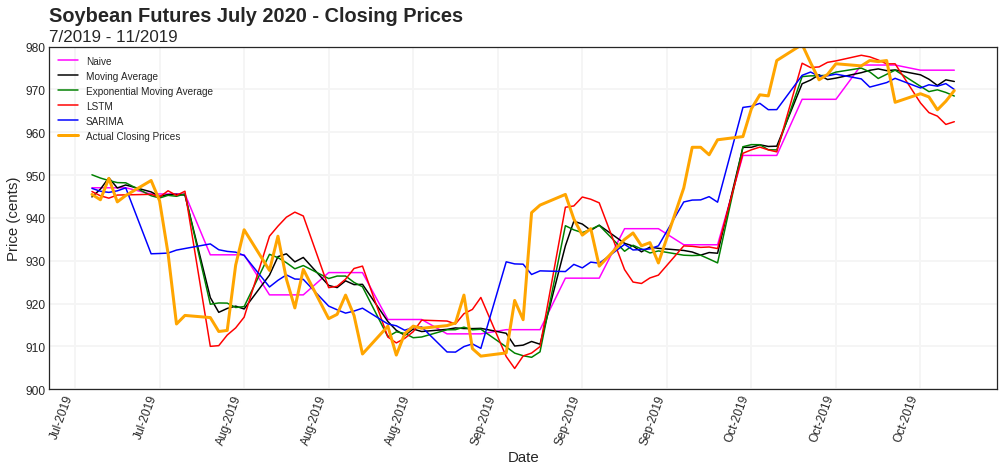

In [0]:
# Plot all the predictions
plotGraph("July", [march_dates['Date'][422:], july_ex_ma['Actual'][0:-5], july_ex_ma['Predicted'][0:-5], july_ma['Predicted'][0:-5],
                    july_sarima['Predicted'][0:-5], july_naive['Predicted'][0:-5], july_lstm['Predicted'][0:-5]])

In [0]:
#plotting the predictions for this weeks
def plotGraph(month, dataframes):
  plt.figure(figsize=(12,7))
  plt.plot(dataframes[0], color='green', label='Exponential Moving Average')
  plt.plot(dataframes[1], color='red', label='Moving Average')
  plt.plot(dataframes[2], color='black', label='SARIMA')
  plt.plot(dataframes[3], color='purple', label='Naive')
  plt.plot(dataframes[4], color='orange',  label='LSTM')
  plt.title('Predictions for {} Contracts'.format(month))
  plt.xlabel('Dates')
  plt.ylabel('Prices')
  plt.legend(loc='best')

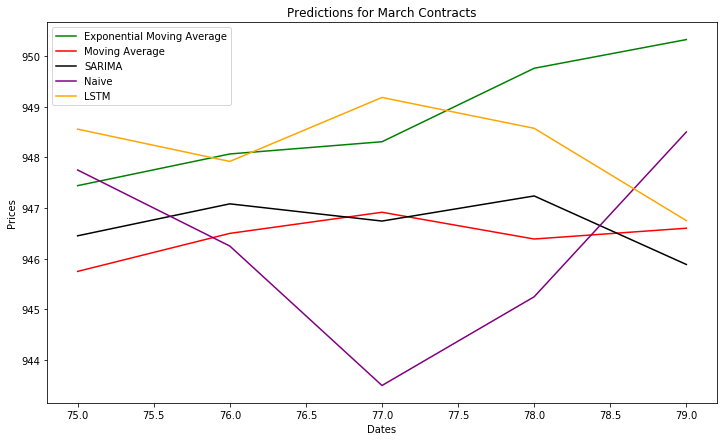

In [0]:
#plots for prediction for March using all methods
plotGraph("March", [march_ex_ma['Predicted'][-5:], 
              march_ma['Predicted'][-5:], march_sarima['Predicted'][-5:],
              march_naive['Predicted'][-5:], march_lstm['Predicted'][-5:]])

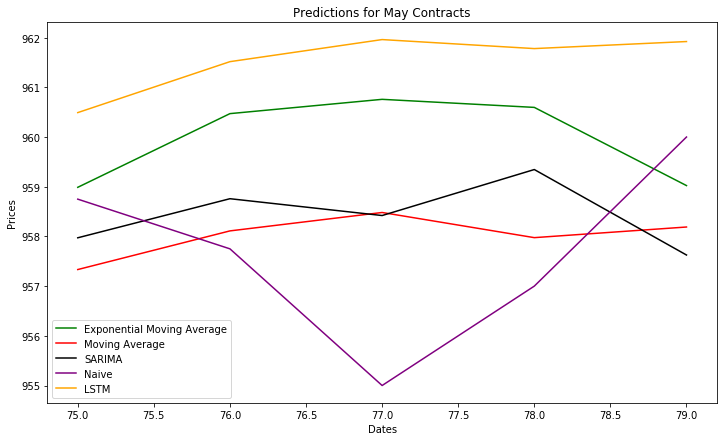

In [0]:
#plots for prediction for May using all methods
plotGraph("May", [may_ex_ma['Predicted'][-5:], 
              may_ma['Predicted'][-5:], may_sarima['Predicted'][-5:],
              may_naive['Predicted'][-5:], may_lstm['Predicted'][-5:]])

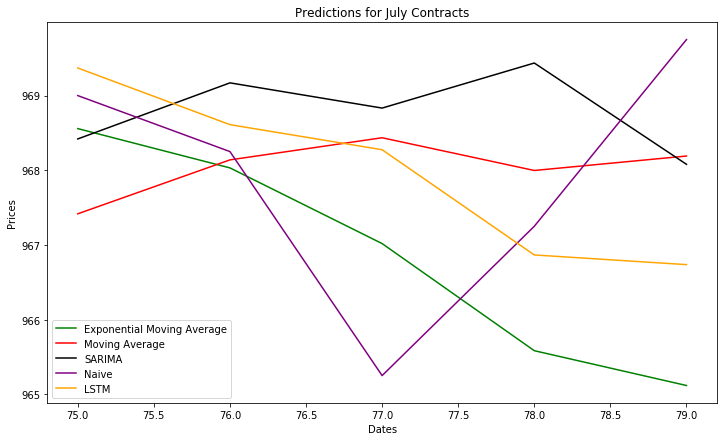

In [0]:
#plots for prediction for July using all methods
plotGraph("July", [july_ex_ma['Predicted'][-5:], 
              july_ma['Predicted'][-5:], july_sarima['Predicted'][-5:],
              july_naive['Predicted'][-5:], july_lstm['Predicted'][-5:]])

In [0]:
# Finding the weight
def getWeights(data, e, s, l, naive):
  actual = np.array(data)
  e = np.array(e)
  s = np.array(s)
  l = np.array(l)

  w_e = 0.0
  w_s = 0.0
  w_l = 0.0
  minVal = float("inf")
  for lstm in np.arange(0.0, 1.0, 0.001):
    for ema in np.arange(0.0, 1.0-lstm, 0.001):
      sarima = 1-ema-lstm
      test = e * ema + s * sarima + l * lstm
      diff = abs(test - actual).mean()
      if diff < minVal:
        w_e = ema
        w_l = lstm
        w_s = sarima
        minVal = diff
  
  naive_mae = abs(actual-naive).mean()
  print("Best weights: e ", w_e, " s ", w_s, " l ", w_l)
  print( "Min ", minVal, " Naive ", naive_mae)
  plotPredicted(w_e, w_s, w_l, e, s, l, actual, naive)
  return w_e, w_s, w_l

In [0]:
def plotPredicted(w_e, w_s, w_l, e, s, l,  actual, naive):
  predicted = w_e * e + w_s * s + w_l * l

  zero = np.zeros(len(predicted))
  diff = abs(predicted-actual)

  pr = predicted.ravel()
  ac = actual.ravel()
  na = naive.ravel()

  fig = plt.figure(figsize=(12,7))
  layout = (1, 2)
  plt1 = plt.subplot2grid(layout, (0, 0))
  plt2 = plt.subplot2grid(layout, (0, 1))

  plt1.plot(ac, color='green', linestyle='dashed', label='Predicted')
  plt1.plot(pr, color='red', label='Actual')
  plt1.plot(n, color='blue', label='Naive')
  plt1.legend(loc='best')
  
  plt2.plot(zero, color='green', label='zero')
  plt2.plot(diff, color='blue', label='Diff')
  plt2.legend(loc='best')

March predictions: 
Best weights: e  0.0  s  0.78  l  0.22
Min  6.880647401656315  Naive  12.623333333333333
Predictions:  [946.91499478 947.26643021 947.27914675 947.53153424 946.07693636]



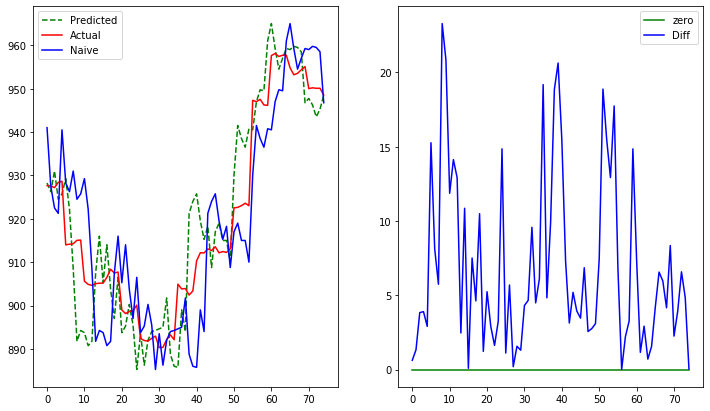

In [0]:
# March predictions
print("March predictions: ")
actual = np.array(march_ma['Actual'][0:-5])
e_tr = np.array(march_ex_ma['Predicted'][0:-5])
s_tr = np.array(march_sarima['Predicted'][0:-5])
l_tr = np.array(march_lstm['Predicted'][0:-5])
naive = np.array(march_naive['Predicted'][0:-5])

w_e, w_s, w_l = getWeights(actual, e_tr, s_tr, l_tr, naive)

e = np.array(march_ex_ma['Predicted'][-5:])
s = np.array(march_sarima['Predicted'][-5:])
l = np.array(march_lstm['Predicted'][-5:])

print("Predictions: ", w_e * e + w_s * s + w_l * l )
print()

May predictions: 
Best weights: e  0.074  s  0.6000000000000001  l  0.326
Min  7.0990738499782715  Naive  13.086666666666666
Predictions:  [958.86874733 959.78455634 959.74759044 960.23181691 959.12958684]



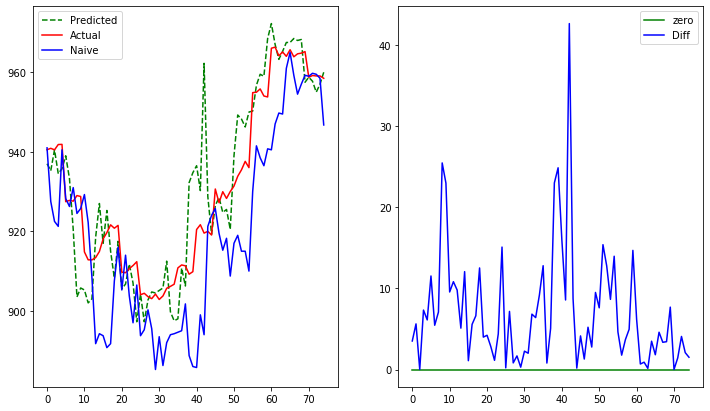

In [0]:
# May predictions
print("May predictions: ")
actual = np.array(may_ma['Actual'][0:-5])
e_tr = np.array(may_ex_ma['Predicted'][0:-5])
s_tr = np.array(may_sarima['Predicted'][0:-5])
l_tr = np.array(may_lstm['Predicted'][0:-5])
naive = np.array(may_naive['Predicted'][0:-5])

w_e, w_s, w_l = getWeights(actual, e_tr, s_tr, l_tr, naive)

e = np.array(may_ex_ma['Predicted'][-5:])
s = np.array(may_sarima['Predicted'][-5:])
l = np.array(may_lstm['Predicted'][-5:])

print("Predictions: ", w_e * e + w_s * s + w_l * l )
print()

July predictions: 
Best weights: e  0.0  s  0.829  l  0.171
Min  6.157962463002909  Naive  11.666666666666666
Predictions:  [968.58177374 969.07465436 968.73726519 968.99651373 967.84967986]



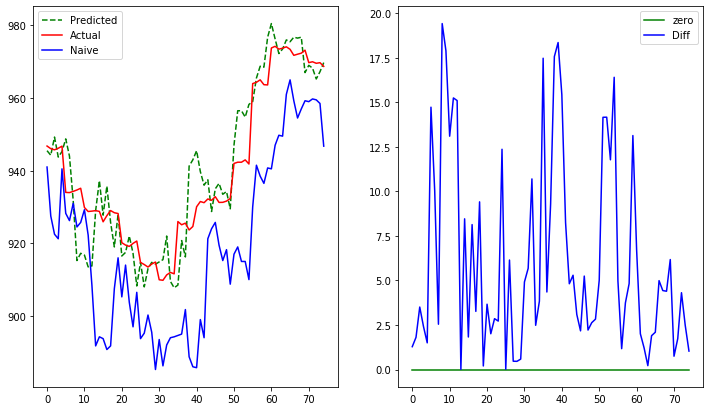

In [0]:
# July predictions
print("July predictions: ")
actual = np.array(july_ma['Actual'][0:-5])
e_tr = np.array(july_ex_ma['Predicted'][0:-5])
s_tr = np.array(july_sarima['Predicted'][0:-5])
l_tr = np.array(july_lstm['Predicted'][0:-5])
naive = np.array(july_naive['Predicted'][0:-5])

w_e, w_s, w_l = getWeights(actual, e_tr, s_tr, l_tr, naive)

e = np.array(july_ex_ma['Predicted'][-5:])
s = np.array(july_sarima['Predicted'][-5:])
l = np.array(july_lstm['Predicted'][-5:])

print("Predictions: ", w_e * e + w_s * s + w_l * l )
print()